# How does age and experience level affect played hours?

## Introduction

### Background Information:

The topic of this project is focused on predicting usage of a Video Game Research Server. A research group in Computer Science at UBC has collected data about how people play video games by setting up a Minecraft server and recording players’ actions as they navigate through the world. Additionally, they also collected data related to game sessions and players’ information. Since the research group wants to target their recruitment effort and make sure they have enough resources to handle the number of players they attract, this project aims to use the data provided and develop a predictive model that estimates future server usage based on players’ information and session data. We will also explore interesting patterns and analyze the results, which can help the research group tailor their recruitment strategies to ensure a scalable research environment.



### Clearly state the question you tried to answer with your project

In order to answer the general question of: **“We would like to know which 'kinds' of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.”** We asked, **how does age and experience level affect played hours?** What age group and experience levels contribute the most hours? The least hours?

### Identify and fully describe the dataset that was used to answer the question

We used the `players.csv` dataset. This dataset contains the following 7 variables and 196 observations:

- `experience` (character, categorical): this represents the player's experience level in the game.  
- `subscribe` (logical): this represents whether or not the player is a subscriber.  
- `hashedEmail` (character, categorical): this represents the player's email in hashed form. It is a way to identify players uniquely.  
- `played_hours` (double, numerical): this represents the total number of hours the player has played. It adds all of the sessions from the sessions dataset to get this number.  
- `name` (character, categorical): name of the player (is not necessarily unique).  
- `gender` (character, categorical): gender of the player.  
- `age` (double, numerical): age of the player.  

The data contains 196 data points meaning there are 196 players. It should be noted at this early stage that a large portion of the players have zero played hours. There are some missing values in age we have to take care of. `experience` and `gender` are in character format which should be converted into factors or numeric format.


## Methods & Results

The analysis predicted `played_hours` using `age` and `experience` from the player dataset.

First, the dataset was loaded from an online source, using only the player data. Rows with missing `age` values were removed. The `experience` variable was formatted into an ordered factor with levels from "Beginner" to "Pro." A new `age_group` variable was created by splitting age into three groups: **"teen"** (≤15), **"young adult"** (>15 and ≤30), and **"adult"** (>30). Both categorical and numeric versions were kept for modeling. A summary of the dataset was performed.

To explore how age, experience, and played_hours relate, a scatter plot was made. It showed most points near zero played hours across all ages, with four outliers around ages 18–20 going over 150 hours. This suggested no clear linear trend between age and played_hours, so `age_group` was used for flexibility.

The dataset was split into 70% training and 30% testing sets with a fixed seed. Four models were built:

1. One with experience (numeric)  
2. One with age (normalized)  
3. One with both experience and normalized age  
4. One with experience and age group (numeric)  

Only `age` was normalized; `experience` and `age_group` stayed as they were. **Linear regression** was used for all models.

Workflows were set up for each model, combining preprocessing and regression, and fitted to the training data. Coefficients were pulled from each model to see how age and experience affected played_hours. Predictions were made on the test set, and performance was measured with **RMSE**, **R²**, and **MAE**.

The model with the highest R² (experience and normalized age) was chosen for a final plot which shows the actual versus predicted `played_hours`.


In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)

urlPlayer <- "https://raw.githubusercontent.com/aric-chan/dsci-100-2024w2-project-005-6/0dbc21753a915e3c1f35c50505f65622deecdc0d/players.csv"
urlSessions <- "https://raw.githubusercontent.com/aric-chan/dsci-100-2024w2-project-005-6/refs/heads/main/sessions.csv"
player_data <- read_csv(urlPlayer)
sessions_data <- read_csv(urlSessions)
# View the first few rows
head(player_data)
head(sessions_data)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [2]:
playerData <- player_data |> 
  filter(!is.na(Age)) |>  # Remove missing age
  mutate(
    age = Age,
    age_group = case_when(
      age <= 15 ~ "teen",      
      age > 15 & age <= 30 ~ "young adult",  
      age > 30 ~ "adult"
    )
  ) |>
  mutate(
    age_group_teen = ifelse(age_group == "teen", 1, 0),
    age_group_young_adult = ifelse(age_group == "young adult", 1, 0),
    age_group_adult = ifelse(age_group == "adult", 1, 0)
  ) |>
  select(experience, age, age_group, played_hours, age_group_teen, age_group_young_adult, age_group_adult)
# Convert experience ordered factor and numeric
playerData <- playerData |> 
  mutate(
    experience = factor(experience, 
                        levels = c("Beginner", "Regular", "Amateur", "Veteran", "Pro"),  
                        ordered = TRUE),
    experience_num = as.numeric(experience)  # Convert to numeric
  )

# Convert age_group to an ordered factor and numeric
playerData <- playerData |> 
  mutate(
    age_group = factor(age_group, 
                       levels = c("teen", "young adult", "adult"),  
                       ordered = TRUE),
    age_num = as.numeric(age_group)  # Convert to numeric
  )

head(playerData)

experience,age,age_group,played_hours,age_group_teen,age_group_young_adult,age_group_adult,experience_num,age_num
<ord>,<dbl>,<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Pro,9,teen,30.3,1,0,0,5,1
Veteran,17,young adult,3.8,0,1,0,4,2
Veteran,17,young adult,0.0,0,1,0,4,2
Amateur,21,young adult,0.7,0,1,0,3,2
Regular,21,young adult,0.1,0,1,0,2,2
Amateur,17,young adult,0.0,0,1,0,3,2


In [3]:
# summary of player data
summary(playerData)

    experience      age              age_group    played_hours    
 Beginner:35   Min.   : 8.00   teen       :  9   Min.   :  0.000  
 Regular :35   1st Qu.:17.00   young adult:174   1st Qu.:  0.000  
 Amateur :63   Median :19.00   adult      : 11   Median :  0.100  
 Veteran :48   Mean   :20.52                     Mean   :  5.905  
 Pro     :13   3rd Qu.:22.00                     3rd Qu.:  0.600  
               Max.   :50.00                     Max.   :223.100  
 age_group_teen    age_group_young_adult age_group_adult  experience_num
 Min.   :0.00000   Min.   :0.0000        Min.   :0.0000   Min.   :1.00  
 1st Qu.:0.00000   1st Qu.:1.0000        1st Qu.:0.0000   1st Qu.:2.00  
 Median :0.00000   Median :1.0000        Median :0.0000   Median :3.00  
 Mean   :0.04639   Mean   :0.8969        Mean   :0.0567   Mean   :2.84  
 3rd Qu.:0.00000   3rd Qu.:1.0000        3rd Qu.:0.0000   3rd Qu.:4.00  
 Max.   :1.00000   Max.   :1.0000        Max.   :1.0000   Max.   :5.00  
    age_num    
 Min

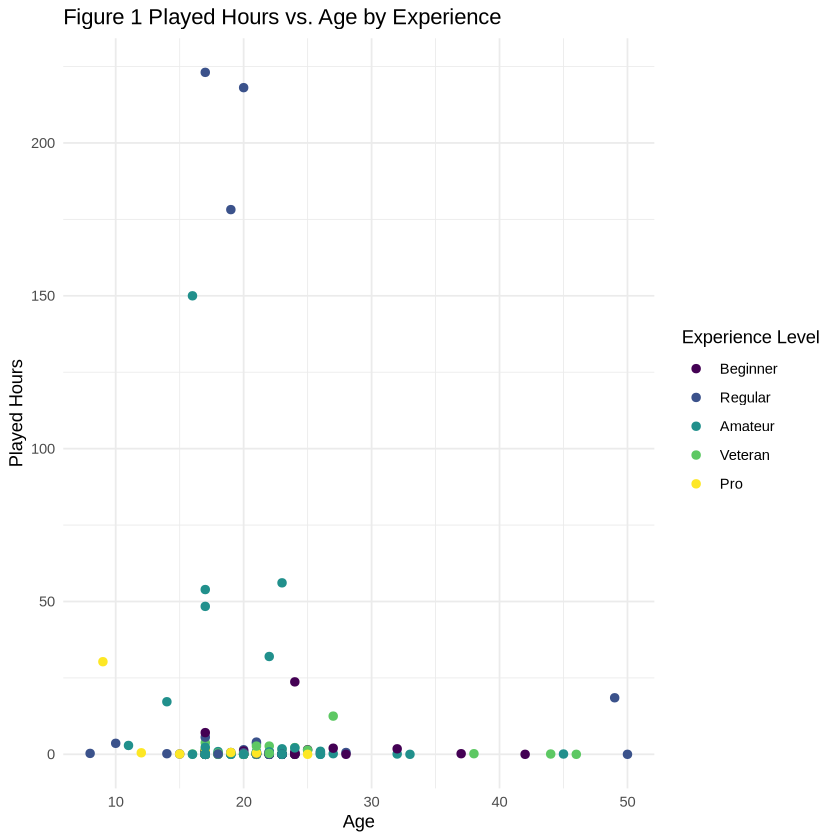

In [4]:
ggplot(playerData, aes(x = age, y = played_hours, color = experience)) +
  geom_point(size = 2) +
  labs(x = "Age", y = "Played Hours", color = "Experience Level", title = "Figure 1 Played Hours vs. Age by Experience") +
  theme_minimal()

In [5]:
#split training test
set.seed(123)  
data_split <- initial_split(playerData, prop = 0.7)  # 70% training, 30% testing
train_data <- training(data_split)
test_data  <- testing(data_split)
test_data <- test_data %>% drop_na(age)

In [6]:
#1 recipe with experience 
recipe_exp <- recipe(played_hours ~ experience_num, data = train_data)

#2 recipe with age
recipe_age <- recipe(played_hours ~ age, data = train_data) |>
              step_normalize(age)

#3 recipe with experience and age (no discretization)
recipe_age_exp <- recipe(played_hours ~ age + experience_num, data = train_data) |>
                  step_normalize(age)

#4 recipe with experience and age group
recipe_age_gp_exp <- recipe(played_hours ~ age_group_young_adult + age_group_adult + experience_num, data = train_data)


In [7]:
reg_model <- linear_reg() %>%
  set_engine("lm") 

In [8]:
# 1 experience workflow
workflow_exp <- workflow() %>%
  add_recipe(recipe_exp) %>%
  add_model(reg_model)

# 2 age workflow
workflow_age <- workflow() %>%
  add_recipe(recipe_age) %>%
  add_model(reg_model)

# 3 experience and age workflow
workflow_age_exp <- workflow() %>%
  add_recipe(recipe_age_exp) %>%
  add_model(reg_model)

# 4 experience and age group workflow
workflow_age_gp_exp <- workflow() %>%
  add_recipe(recipe_age_gp_exp) %>%
  add_model(reg_model)


In [9]:
#1 experience fit
fitted_exp <- fit(workflow_exp, data = train_data)

#2 age fit
fitted_age <- fit(workflow_age, data = train_data)

#3 experience and age fit
fitted_age_exp <- fit(workflow_age_exp, data = train_data)

#4 experience and age group fit
fitted_age_gp_exp <- fit(workflow_age_gp_exp, data = train_data)

In [10]:
# Extract coefficients for the experience model 
exp_fit <- fitted_exp |>
  extract_fit_parsnip() |>
  pluck("fit")  

# Print coefficients
cat("Coefficients for Experience Model (experience_num):\n")
print(coef(exp_fit))

# Extract coefficients for the age model 
age_fit <- fitted_age |>
  extract_fit_parsnip() |>
  pluck("fit")  

# Print coefficients
cat("Coefficients for Age Model (age):\n")
print(coef(age_fit))

# Extract coefficients for the experience and age model 
age_exp_fit <- fitted_age_exp |>
  extract_fit_parsnip() |>
  pluck("fit")  

# Print coefficients
cat("Coefficients for Experience and Age Model (experience_num + age normalized):\n")
print(coef(age_exp_fit))

# Extract coefficients for the experience and age group model 
age_gp_exp_fit <- fitted_age_gp_exp |>
  extract_fit_parsnip() |>
  pluck("fit")  

# Print coefficients
cat("Coefficients for Experience and Age group Model (experience_num + age_group):\n")
print(coef(age_gp_exp_fit))

Coefficients for Experience Model (experience_num):
   (Intercept) experience_num 
      8.617772      -1.251091 
Coefficients for Age Model (age):
(Intercept)         age 
   5.225926   -1.465311 
Coefficients for Experience and Age Model (experience_num + age normalized):
   (Intercept)            age experience_num 
      8.949421      -1.622726      -1.373420 
Coefficients for Experience and Age group Model (experience_num + age_group):
          (Intercept) age_group_young_adult       age_group_adult 
            3.7801760             5.4161586            -0.3379055 
       experience_num 
           -1.3109731 


In [11]:
#1 experience
test_data_exp <- test_data %>% drop_na(age)
predict_exp <- predict(fitted_exp, new_data = test_data_exp) %>%
  bind_cols(test_data_exp)  

# #2 age
test_data_age <- test_data %>% drop_na(age)
predict_age <- predict(fitted_age, new_data = test_data) %>%
  bind_cols(test_data_age)  

# #3 experience and age
test_data_exp_age <- test_data %>% drop_na(age)
predict_exp_age <- predict(fitted_age_exp, new_data = test_data) %>%
  bind_cols(test_data_exp_age)  

# #4 experience and age group
test_data_exp_age_gp <- test_data %>% drop_na(age)
predict_exp_age_gp <- predict(fitted_age_gp_exp, new_data = test_data) %>%
  bind_cols(test_data_exp_age_gp)  

In [12]:
# 1 metric as exp
metrics_exp <- predict_exp %>%
  metrics(truth = played_hours, estimate = .pred)

print(metrics_exp)  

# A tibble: 3 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard     30.2   
2 rsq     standard      0.0182
3 mae     standard      9.90  


In [13]:
# 2 metric as age  
metrics_age <- predict_age %>%
  metrics(truth = played_hours, estimate = .pred)

print(metrics_age)  

# A tibble: 3 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard    30.2    
2 rsq     standard     0.00421
3 mae     standard    10.5    


In [14]:
# 3 metric as experience and age 
metrics_exp_age <- predict_exp_age %>%
  metrics(truth = played_hours, estimate = .pred)

print(metrics_exp_age) 

# A tibble: 3 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard     30.1   
2 rsq     standard      0.0167
3 mae     standard     10.2   


In [15]:
# 4 metric as experience and age group 
metrics_exp_age_gp <- predict_exp_age_gp %>%
  metrics(truth = played_hours, estimate = .pred)

print(metrics_exp_age_gp) 

# A tibble: 3 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard    30.3    
2 rsq     standard     0.00545
3 mae     standard    10.2    


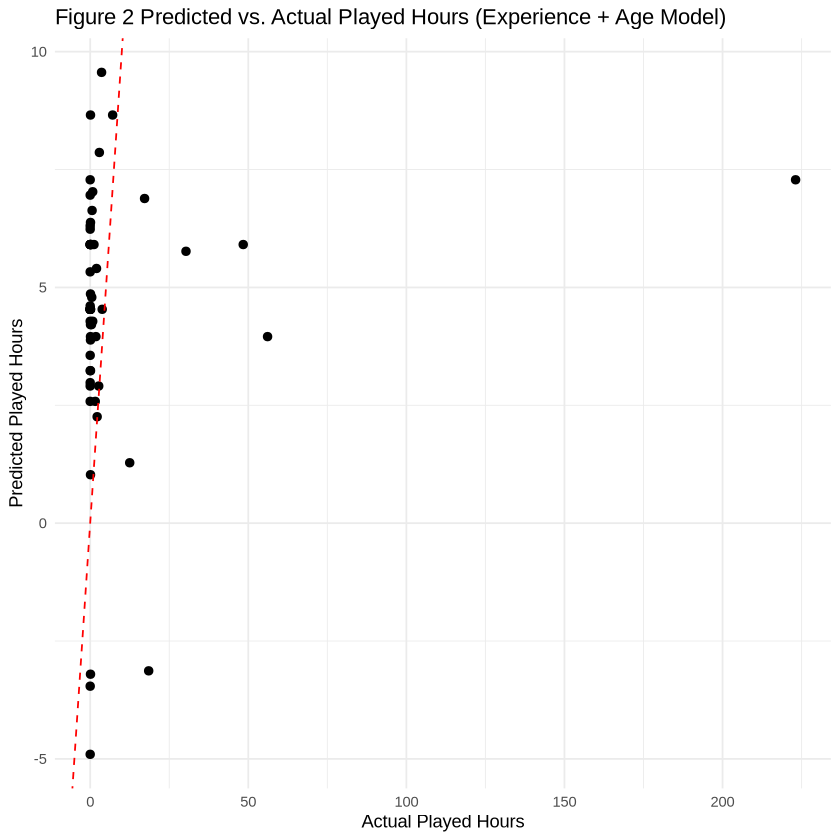

In [16]:
# plot the actual vs predict with highest R
ggplot(predict_exp_age, aes(x = played_hours, y = .pred)) +
  geom_point(size = 2) +
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
  labs(x = "Actual Played Hours", y = "Predicted Played Hours", 
       title = "Figure 2 Predicted vs. Actual Played Hours (Experience + Age Model)") +
  theme_minimal()

In [17]:
#KNN classification starts below

players <- read_csv(urlPlayer)

players_s <- players |> 
    drop_na() |> 
    mutate(experience_num = case_when(
        experience == "Beginner" ~ 1, 
        experience == "Amateur" ~ 2,
        experience == "Regular" ~ 3, 
        experience == "Veteran" ~ 4, 
        experience == "Pro" ~ 5)) |>
        select(experience_num, played_hours, Age)
        # |>       filter(played_hours < 100)
# players_s

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


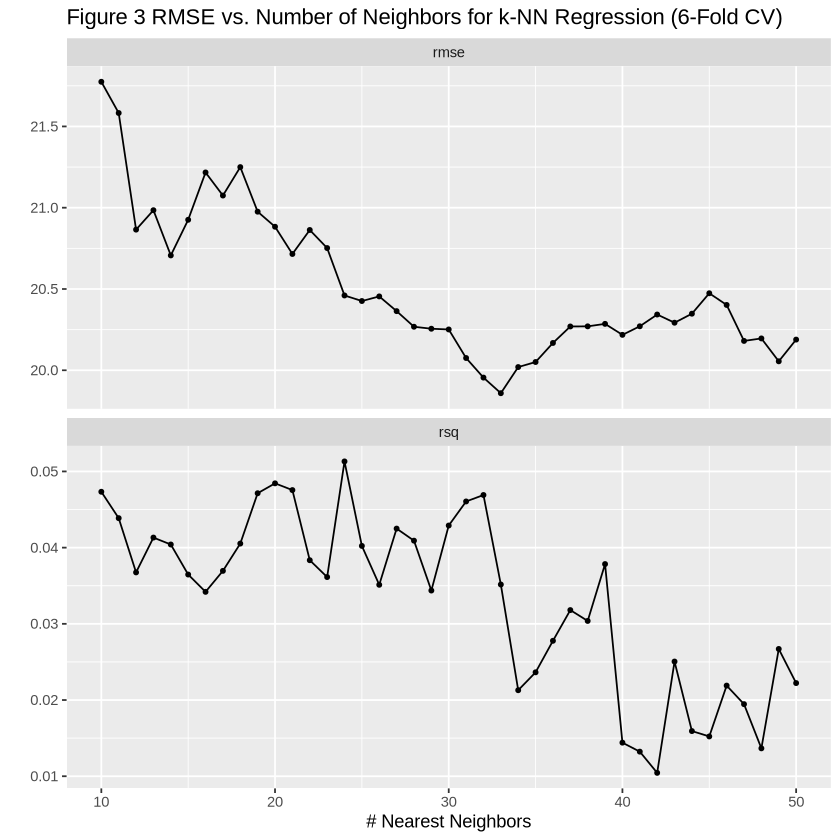

In [18]:
set.seed(219)

players_split <- initial_split(players_s, prop = 0.8, strata = played_hours)
players_train <- training(players_split)
players_test <- testing(players_split)


players_recipe <- recipe(played_hours ~ experience_num + Age, data = players_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())


players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

players_vfold <- vfold_cv(players_train, v = 6, strata = played_hours)

players_wkflw <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_spec)

gridvals <- tibble(neighbors = seq(10, 50))

players_results <- players_wkflw |>
  tune_grid(resamples = players_vfold, grid = gridvals) #|>
 # collect_metrics() |>
 # filter(.metric == "rmse")

autoplot(players_results)+
  ggtitle("Figure 3 RMSE vs. Number of Neighbors for k-NN Regression (6-Fold CV)")

players_results_rmse <- collect_metrics(players_results) |>
    filter(.metric == "rmse")


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,33.8426262
rsq,standard,0.1505396
mae,standard,9.6893939


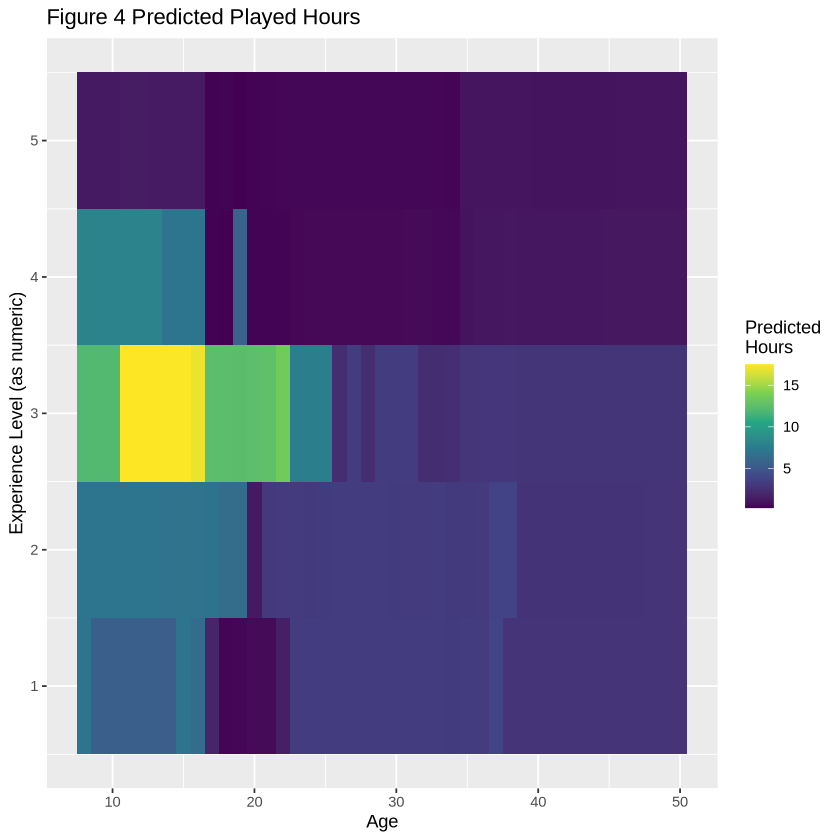

In [19]:
players_min_rmse <- players_results_rmse |>
  filter(mean == min(mean))

kmin <- players_min_rmse |> pull(neighbors)

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) |>
  set_engine("kknn") |>
  set_mode("regression")

players_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_spec) |>
  fit(data = players_train)

test_results <- players_fit |>
  predict(players_test) |>
  bind_cols(players_test) |>
  metrics(truth = played_hours, estimate = .pred) 

test_results

new_grid <- expand_grid(
  Age = seq(min(players_s$Age), max(players_s$Age), by = 1),
  experience_num = seq(1, 5, by = 1))

predicted_grid <- predict(players_fit, new_data = new_grid) |>
  bind_cols(new_grid)

ggplot(predicted_grid, aes(x = Age, y = experience_num, fill = .pred)) +
  geom_tile() +
  scale_fill_viridis_c() +
  labs(title = "Figure 4 Predicted Played Hours",
       x = "Age",
       y = "Experience Level (as numeric)",
       fill = "Predicted\nHours") 

## Discussion

### Summarize what you found

#### Linear Regression:

After running four models, we extracted the intercept and coefficients. All four models have a **positive intercept** (from 5.2 to 11), suggesting players with very junior level and young age have a hypothetical positive playing hour (we can’t have a person of age 0 to play). 

Then, the `age` and `experience` coefficients exhibit **negative values** around -1.2 to -1.6. The negative age coefficient suggests the older the person, the fewer hours they played. For `experience`, we also obtained **negative coefficients**, meaning the more experienced the player is, the fewer hours they played.

- **R²** for experience and age group was the highest: **1.67%**  
- **R²** for age (continuous) was the lowest: **0.4%**  
- **RMSE** for all models was around **30**  

The extremely low R² values are alarming. The actual vs predicted plot shows data points on the right side of the fitted line are more spread out compared to the left, suggesting the fitted line may not explain the trend well.

#### KNN Regression:

Because of this, we also tried **KNN regression**. Using this method, we found:

- The dataset is small, and many played_hours are zero  
- There are **four outliers** above 150 hours, with others mostly below 50  
- Many players have **zero** played_hours  

This high variability in the target variable limits how well any model can perform. Players of the same age and experience level played vastly different hours. The KNN model could only predict a small amount of this variance.

R² varied significantly across seeds (from **0.01 to 0.15**), depending on how outliers were split into training and test sets. If distributed fairly, the model could reach **0.15**, otherwise it performed poorly.

The **optimal k** value was consistently between **30–40**, indicating high variance in the data. Very small k values overfit the data.

Despite low R², the model found that **players aged 18–23 with regular experience** played the most hours on average. Although limited by outliers and small samples, this trend seems significant.


### Discuss whether this is what you expected to find

#### Linear Regression:

We **expected** experience to be **positively linked** to played_hours. It makes sense that experienced players would play more. But all models showed a **negative coefficient** for experience, which was surprising.

For age, most models gave a **negative coefficient**, suggesting older players played less. Yet, our scatter plot showed **18–20 year olds** had high hours. One model that grouped age into categories did show a **positive coefficient** for older age groups compared to the base (under 15), which partially aligned with this observation.

We didn’t expect strong model results due to the large number of zero played_hours. The imbalance makes it hard for models to detect patterns.

Outliers likely caused the negative slope in the regression line. The line starts high to reduce error from outliers, but then must slope down to fit the remaining data, leading to a negative coefficient for age.

#### KNN Regression:

Regular players aged **18–23** were the most common group, so it makes sense that similar players would also play more. Minecraft is a **social** game—players are likely to engage with peers of similar age and skill.

However, some surprises included:

- **Optimal k value** was much higher than expected (30–40), unlike our course examples  
- **R² varied** a lot with different seeds  
- **Low ceiling** for R² due to high noise in the real-world dataset  

These challenges are expected when working with real-world data, and highlight the limits of predictive modeling in small, noisy datasets.


### Discuss what impact such findings could have

#### Linear Regression:

We need to be cautious when interpreting coefficients. Without understanding the data quality, we risk making **incorrect decisions**. The very **low R²** and high RMSE suggest the models barely explain played_hours.

If designers use these flawed models, they could set **bad game rules**. For example, if they assume experienced players need more hours and reward them with powerful items, it could harm game balance.

#### KNN Regression:

The findings remind us that **age and experience** alone are insufficient predictors. We may need **more relevant features** such as:

- Player motivation  
- Self-rated interest level  
- In-game behavior or goal orientation  

The impact of **outliers** and **small sample size** is significant and shows the importance of **better data collection** and **thoughtful preprocessing**.

Lastly, working with messy, real-world data teaches us to **interpret models carefully** and maintain a balance between automation and human decision-making.


### Discuss what future questions this could lead to

Given age and skill alone don’t explain much, future research could explore:

- **What additional factors influence played_hours?**  
- Do **social behaviors**, **career background**, **environment**, or **personal goals** impact game usage?  
- Can **in-game metrics**, **chat behavior**, or **session frequency** provide better predictive power?  
- How does **player retention** relate to these factors over time?
